# Assignment 4
k Means
Use Iris flower data for clustering petals into k groups
Apply k means clustering, pick optimal number for k using elbow method or silhouette method, and visualize the clusters (pick any two dimensions that better showcases the clusters)

______________________________________________________________________________________________________________
The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Ronald Fisher.

The data set consists of 50 samples of each of the three types of iris (Iris Setosa, Iris virginica, and Iris versicolor). Four characteristics were measured from each sample: the length and  width of the sepals and petals in centimeters. Based on the combination of these four characteristics, Fisher developed a linear discriminant model to distinguish the species from each other.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

## Reading dataset

In [2]:
iris = pd.read_csv("./IRIS.csv")
x = iris.iloc[:, [0, 1, 2, 3]].values

print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Frequency distribution of species

In [4]:
iris_outcome = pd.crosstab(index=iris["species"],  # Make a crosstab using Pnadas
                              columns="count")      # Name the count column

iris_outcome

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [5]:
iris_setosa=iris.loc[iris["species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]

## Distribution plots



### Plotting each flower to a histogram

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot`

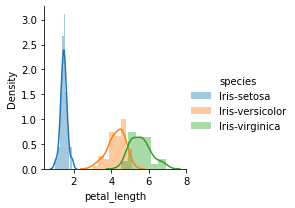

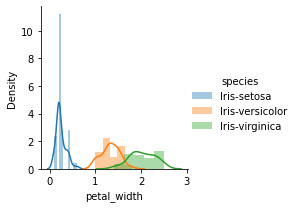

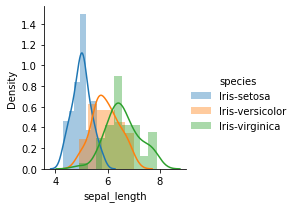

In [6]:
sns.FacetGrid(iris,hue="species",size=3).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(iris,hue="species",size=3).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(iris,hue="species",size=3).map(sns.distplot,"sepal_length").add_legend()
plt.show()

### Box Plots

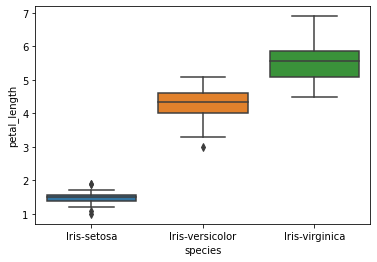

In [7]:
sns.boxplot(x="species",y="petal_length",data=iris)
plt.show()

### Violin plots

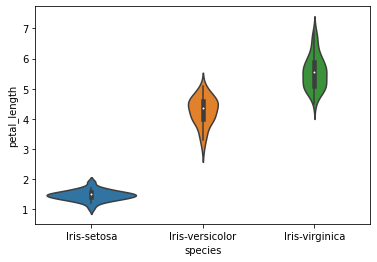

In [8]:
sns.violinplot(x="species",y="petal_length",data=iris)
plt.show()

### Scatter plots

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


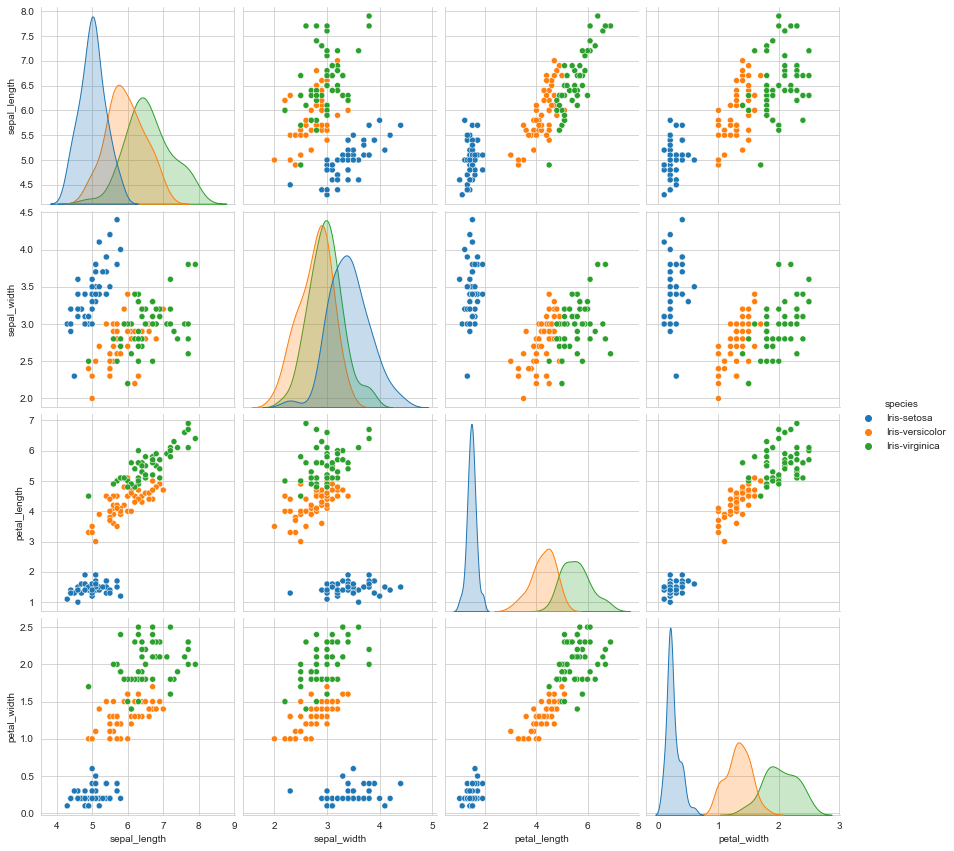

In [9]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",size=3);
plt.show()

## K-Means

##### How to Implementing K-Means Clustering ?

Step 1 -> Choose the number of clusters k

Step 2 -> Select k random points from the data as centroids

Step 3 -> Assign all the points to the closest cluster centroid

Step 4 -> Recompute the centroids of newly formed clusters

Step 5 -> Repeat steps 3 and 4

In [10]:
#Finding the optimum number of clusters for k-means classification

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Elbow Method

## Using the elbow method to determine the optimal number of clusters for k-means clustering

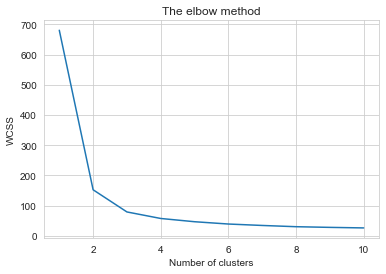

In [11]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

## Implementing K-Means Clustering

In [12]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

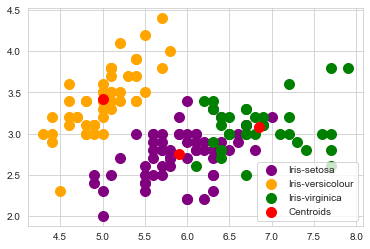

In [13]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

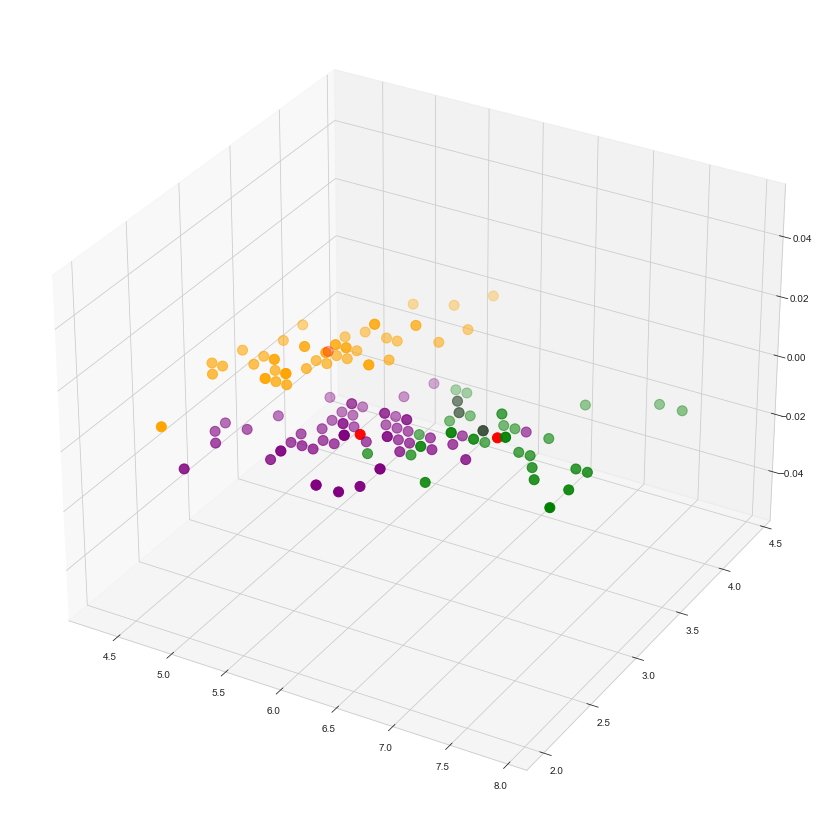

In [14]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

** Please note the the above 3-d scatterplot and previously used Voilen plot were copied-pasted from a public notebook. I'm new to them